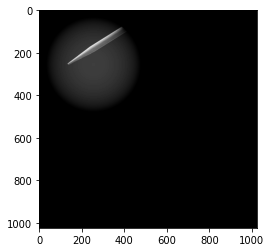

[[4.02768361e+07 4.41787777e+07 4.02768361e+07 ... 2.10845001e+02
  2.97177082e+02 5.75973049e+02]
 [4.41787777e+07 3.41281910e+08 4.41787777e+07 ... 3.18628203e+02
  3.36899958e+02 2.23177413e+02]
 [4.02768361e+07 4.41787777e+07 4.02768361e+07 ... 2.10845001e+02
  2.97177082e+02 5.75973049e+02]
 ...
 [2.10845001e+02 3.18628203e+02 2.10845001e+02 ... 1.23033511e+03
  3.10677205e+01 3.61799453e+01]
 [2.97177082e+02 3.36899958e+02 2.97177082e+02 ... 3.10677205e+01
  6.06342318e+02 2.70340343e+02]
 [5.75973049e+02 2.23177413e+02 5.75973049e+02 ... 3.61799453e+01
  2.70340343e+02 2.52677541e+01]]


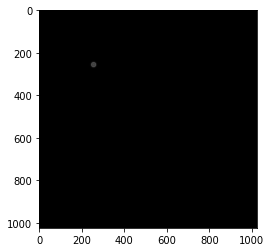

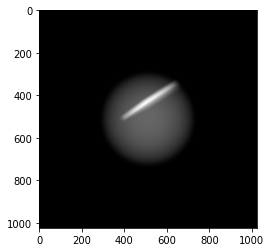

In [885]:
import numpy as np
from PIL import Image, ImageOps
import math
import random
import sys, getopt
from scipy.fft import fft2, fftfreq, fftshift, ifft2
from scipy import fftpack, ndimage
from matplotlib import pyplot as plt
import cmath
from scipy.signal import convolve2d
from matplotlib.pyplot import imread
import os
import time

def M(x, y):
    if(x**2 + y**2 < (math.pi/2)**2):
        return 1
    else:
        return 0

def p_s(x, y, delta_z):
    return 0.375 * delta_z * math.pi * (x**2 + y**2)

    
def p(x, y):
    return 0.5 * math.pi * (x**2 + y**2)

def h(delta_z):  # создает матрицу для фильтра нужной нам размерности (h)
# от сигма зависит степень размытия. чем больше сигма тем больше размытие
    
    matr = np.zeros(shape = (512,512), dtype = np.complex128) # матрица из 0 (по размеру изборжания подаваемого)
                                          
    #|F(M(x,y)∙exp{i∙p_s (x,y,∆z_nm )+i∙p(x,y)})|
    
    #p_s = 0.375* math.pi * (разность между слоями) * (x**2 + y**2) 
     
    for i in range(matr.shape[0]):
        for j in range(matr.shape[1]):
            x = math.pi/511*(i-255)
            y = math.pi/511*(j-255)
            matr[i, j] = M(x,y) * cmath.exp(1j * p_s(x, y, delta_z) + 1j * p(x, y))
            
    return abs(fftshift(fft2(matr)))**2

# Загружаем картинку
im = Image.open("src_0002.png",'r')
# im = im.transpose(Image.FLIP_LEFT_RIGHT)
# im = im.transpose(Image.FLIP_TOP_BOTTOM)
# im = im.convert('1')
data = np.array(im)                         #представляем как массив
data_im_fl = data[:,:,0].astype(np.float)   # делаем чб

im_f_n = np.zeros(shape = (1024,1024), dtype = float)
im_f_n[0:512,0:512] = data_im_fl            #расширяем

np.savetxt("image512-1024-3.txt", im_f_n, fmt='%f')

plt.imshow(im_f_n[0:1024, 0:1024], cmap = "gist_gray")
plt.show()

h_f_n = np.zeros(shape = (1024,1024), dtype = float)
# h_f_n = np.zeros(shape = (512,512), dtype = float)
h_f_n[0:512, 0:512] = h(delta_z = math.pi * 2)
# h_f_n = fft2(h_f_n)
# np.savetxt("h_func_1024_complex_python.txt", h_f_n, fmt='%f')
# np.savetxt("h_func_512.txt", h_f_n, fmt='%f')
# print(h_f_n.max())
# print(h_f_n.min())
# print('\n')
print(h_f_n[255:512,255:512])
plt.imshow(h_f_n[0:1024, 0:1024], cmap = "gist_gray")
plt.show()


# print(h_f_n.max())
# print(h_f_n.min())
# plt.imshow(h_f_n[0:512, 0:512], cmap = "gist_gray")
# plt.show()
# np.savetxt("h_func.txt", h_f_n, fmt='%f')

final = abs( ifft2((fft2(im_f_n)) * (fft2(h_f_n))) )
# final = abs(ifft2(fftshift(fft2(im_f_n))))
plt.imshow(final[0:1024, 0:1024], cmap = "gist_gray")
plt.show()


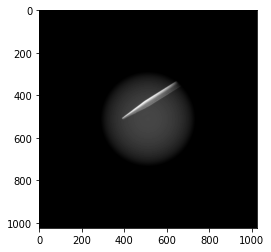

In [900]:
# a = np.loadtxt("h_func_512_from_c.txt")
# a = np.loadtxt("h_func_512_from_c_fft_abs.txt")
# a = np.loadtxt("h_func_1024_fr_python.txt")
# h_from_c = np.zeros(shape = (1024,1024), dtype = float)
# h_from_c[0:512,0:512] = a
# a = np.loadtxt("h_func_1024_from_c.txt")
# a = np.loadtxt("result.txt")
# a = np.loadtxt("h_matrix_rash.txt")
# a = abs(fftshift(a))**2
# print(a.shape)
# print(a.max())

# print(a.min())
# print('\n')
# print(a[0:10])
# np.savetxt("h_func_1024_fr_python.txt", h_from_c, fmt='%f')
# plt.imshow(a[0:1024,0:1024], cmap = "gist_gray")
# plt.show()

a = np.loadtxt('result.txt')
# a = np.loadtxt('h_final.txt')
# a = np.loadtxt('image512-1024.txt')
# a = abs(ifft2(fft2(a)))

# print(a[0:10])
# a = abs(ifft2(a))
plt.imshow(a[0:1024,0:1024], cmap = "gist_gray")
plt.show()

